In [ ]:
#install twint, nest_asyncio
! pip install -qq twint
! pip install -qq nest_asyncio


     |████████████████████████████████| 1.2MB 5.7MB/s 
     |████████████████████████████████| 245kB 13.8MB/s 
     |████████████████████████████████| 225kB 13.7MB/s 
     |████████████████████████████████| 153kB 17.0MB/s 
     |████████████████████████████████| 266kB 17.8MB/s 
     |████████████████████████████████| 235kB 16.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 


In [1]:
import pandas as pd

# extract data from twitter 
import twint

##Solve compatibility issues with notebooks and RunTime errors
import nest_asyncio
nest_asyncio.apply()


In [2]:
# import nltk libraries

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string 



In [3]:
# setting up twint config

c= twint.Config()

# extracting data from twitter

c.Search= "COVID19"
c.Lang="en"
c.Pandas= True
c.Limit= 100

twint.run.Search(c)


1306246616832077825 2020-09-16 15:00:36 UTC <oigetit_com> #Breaking - The U.S. government on Wednesday said it will start distributing a COVID-19 vaccine within one day of regulatory authorization as it plans for the possibility that a limited number of vaccine doses.  Read more:  http://oigetit.com  #COVID19 #vaccines pic.twitter.com/2dErnxjQw4
1306246614122717184 2020-09-16 15:00:36 UTC <bucklerog> So Trump knew how bad covid19 is he has insighted his MAGA'S to protest against them. He knew and still no mandate.  How that inciting panic??? #TrumpLies200kDies
1306246613460045826 2020-09-16 15:00:36 UTC <Nomad_Prophetc> Here we are 2 or 3 weeks in since school began and the school is now shutting down indefinitely for the in-person students because a sh*t load of kids have contracted #COVID19.  It's true. You can't fix stupid.
1306246612335943680 2020-09-16 15:00:35 UTC <Nomad_Prophetc> Here's your shocker of the day.   Due to #COVID19 my kids school gave the option of remote learning 

In [4]:
# Saving in dataframe

def columne_names():
  return twint.output.panda.Tweets_df.columns

In [6]:
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]

In [7]:
data= twint_to_pd(["tweet"])

In [8]:
data.head()

,tweet
0,#Breaking - The U.S. government on Wednesday s...
1,So Trump knew how bad covid19 is he has insigh...
2,Here we are 2 or 3 weeks in since school began...
3,Here's your shocker of the day. \n\nDue to #CO...
4,One TN county has postponed fall contact sport...


In [9]:
 data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data

,tweet
0,Breaking The U S government on Wednesday s...
1,So Trump knew how bad covid19 is he has insigh...
2,Here we are 2 or 3 weeks in since school began...
3,Here s your shocker of the day Due to COVI...
4,One TN county has postponed fall contact sport...
...,...
95,Check out our guide to the Covid19 supports f...
96,Stouffville town hall to remain closed until ...
97,The GaonConnection survey on impact of COVID...
98,I looked at the Aug 27th presentation slides b...


Preprocessing process (involves 4 steps )
1. Removing punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/ stem

In [11]:
# removing short words/ punctuation
data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data

,tweet
0,Breaking government Wednesday said will start ...
1,Trump knew covid19 insighted MAGA protest agai...
2,Here weeks since school began school shutting ...
3,Here your shocker COVID19 kids school gave opt...
4,county postponed fall contact sports covid19 p...
...,...
95,Check guide Covid19 supports business https 3b...
96,Stouffville town hall remain closed until 2021...
97,GaonConnection survey impact COVID19 lockdown ...
98,looked 27th presentation slides covid19 Laura ...


In [13]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
nltk.download("stopwords")
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# remove stopwords

def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
data

,tweet
0,"[breaking, government, wednesday, said, start,..."
1,"[trump, knew, covid19, insighted, maga, protes..."
2,"[weeks, since, school, began, school, shutting..."
3,"[shocker, covid19, kids, school, gave, option,..."
4,"[county, postponed, fall, contact, sports, cov..."
...,...
95,"[check, guide, covid19, supports, business, ht..."
96,"[stouffville, town, hall, remain, closed, 2021..."
97,"[gaonconnection, survey, impact, covid19, lock..."
98,"[looked, 27th, presentation, slides, covid19, ..."


In [17]:
# Porter Stemmer
ps= nltk.PorterStemmer()

In [18]:
# stemming 

def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
data

,tweet
0,"[break, govern, wednesday, said, start, distri..."
1,"[trump, knew, covid19, insight, maga, protest,..."
2,"[week, sinc, school, began, school, shut, inde..."
3,"[shocker, covid19, kid, school, gave, option, ..."
4,"[counti, postpon, fall, contact, sport, covid1..."
...,...
95,"[check, guid, covid19, support, busi, http, 3b..."
96,"[stouffvil, town, hall, remain, close, 2021, c..."
97,"[gaonconnect, survey, impact, covid19, lockdow..."
98,"[look, 27th, present, slide, covid19, laura, s..."


In [20]:
data= pd.DataFrame(data["tweet"])

In [21]:
data

,tweet
0,"[break, govern, wednesday, said, start, distri..."
1,"[trump, knew, covid19, insight, maga, protest,..."
2,"[week, sinc, school, began, school, shut, inde..."
3,"[shocker, covid19, kid, school, gave, option, ..."
4,"[counti, postpon, fall, contact, sport, covid1..."
...,...
95,"[check, guid, covid19, support, busi, http, 3b..."
96,"[stouffvil, town, hall, remain, close, 2021, c..."
97,"[gaonconnect, survey, impact, covid19, lockdow..."
98,"[look, 27th, present, slide, covid19, laura, s..."


In [28]:
data_list = data.loc[:,"tweet"].to_list()
len(data_list)

100

In [29]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

2021

In [31]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [32]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 838,
          2: 189,
          3: 54,
          4: 34,
          5: 13,
          6: 10,
          7: 6,
          8: 3,
          9: 1,
          10: 1,
          11: 1,
          12: 1,
          13: 1,
          15: 1,
          23: 1,
          53: 1,
          67: 1,
          103: 1})

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


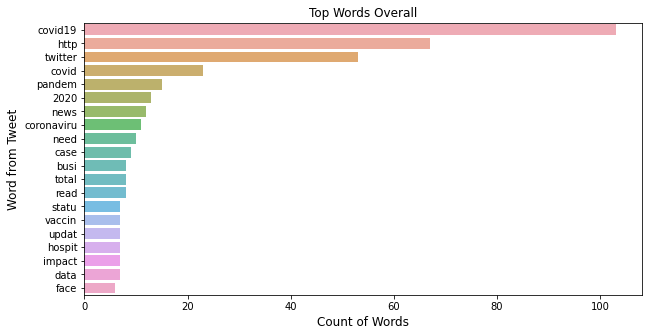

In [36]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()